In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_excel(r'C:\Users\bhatt\Downloads\Model Data.xlsx')
data.head()

,Row Labels,Hour,Date-Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,...,Dew C,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW
0,2014-05-01,0,5/1/2014-0,5,2014,1,18,4,6,6,...,6,97.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,35
1,2014-05-01,1,5/1/2014-1,5,2014,1,18,4,6,6,...,6,100.0,16.1,WSW,14.8,NaN,NaN,NaN,Overcast,35
2,2014-05-01,2,5/1/2014-2,5,2014,1,18,4,6,6,...,6,98.0,16.1,WSW,13,NaN,NaN,NaN,Overcast,35
3,2014-05-01,3,5/1/2014-3,5,2014,1,18,4,7,6,...,6,100.0,16.1,WSW,14.8,25.9,NaN,NaN,Light Drizzle,36
4,2014-05-01,4,5/1/2014-4,5,2014,1,18,4,6,6,...,6,100.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,63


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row Labels            8215 non-null   datetime64[ns]
 1   Hour                  8215 non-null   int64         
 2   Date-Hour             8215 non-null   object        
 3   Month                 8215 non-null   int64         
 4   Year                  8215 non-null   int64         
 5   Sum/Win               8215 non-null   int64         
 6   WeekNumber            8215 non-null   int64         
 7   Weeday                8215 non-null   int64         
 8   Prior Period Temp C   8215 non-null   int64         
 9   Avg Temp C            8215 non-null   int64         
 10  Winter HDD (51 Base)  8215 non-null   float64       
 11  Summer CDD (51 Base)  8215 non-null   float64       
 12  Max Temp C            8215 non-null   int64         
 13  Dew C             

# Identifying % of missing values for continous feature

In [4]:
numerical_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
for feature in numerical_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),2)))

Humidity: 0.0% missing value
Visibility (km): 0.0% missing value
Gust Speed (km/h): 0.81% missing value
Precip (mm): 0.98% missing value


# Identifying % of missing value for categorical features

In [5]:
cat_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values
for feature in cat_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),2)))

Events: 0.95% missing value


In [7]:
data['Date']=data['Date-Hour'].str.split('/').str[1]

In [8]:
data.head()

,Row Labels,Hour,Date-Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,...,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW,Date
0,2014-05-01,0,5/1/2014-0,5,2014,1,18,4,6,6,...,97.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,35,1
1,2014-05-01,1,5/1/2014-1,5,2014,1,18,4,6,6,...,100.0,16.1,WSW,14.8,NaN,NaN,NaN,Overcast,35,1
2,2014-05-01,2,5/1/2014-2,5,2014,1,18,4,6,6,...,98.0,16.1,WSW,13,NaN,NaN,NaN,Overcast,35,1
3,2014-05-01,3,5/1/2014-3,5,2014,1,18,4,7,6,...,100.0,16.1,WSW,14.8,25.9,NaN,NaN,Light Drizzle,36,1
4,2014-05-01,4,5/1/2014-4,5,2014,1,18,4,6,6,...,100.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,63,1


In [9]:
data=data.drop(['Row Labels'],axis=1)


In [11]:
data=data.drop(['Date-Hour'],axis=1)

In [12]:
data.head()

,Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,Winter HDD (51 Base),Summer CDD (51 Base),...,Humidity,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW,Date
0,0,5,2014,1,18,4,6,6,0.3,0.0,...,97.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,35,1
1,1,5,2014,1,18,4,6,6,0.3,0.0,...,100.0,16.1,WSW,14.8,NaN,NaN,NaN,Overcast,35,1
2,2,5,2014,1,18,4,6,6,0.3,0.0,...,98.0,16.1,WSW,13,NaN,NaN,NaN,Overcast,35,1
3,3,5,2014,1,18,4,7,6,0.3,0.0,...,100.0,16.1,WSW,14.8,25.9,NaN,NaN,Light Drizzle,36,1
4,4,5,2014,1,18,4,6,6,0.3,0.0,...,100.0,16.1,West,14.8,NaN,NaN,NaN,Overcast,63,1


In [17]:
data['Date']=data['Date'].astype(int)

In [20]:
data['Wind Speed (km/h)']=data['Wind Speed (km/h)'].replace(to_replace ="Calm", 
                 value ="0") 

In [30]:
#data['Wind Speed (km/h)']=data['Wind Speed (km/h)'].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Month                 8215 non-null   int64  
 2   Year                  8215 non-null   int64  
 3   Sum/Win               8215 non-null   int64  
 4   WeekNumber            8215 non-null   int64  
 5   Weeday                8215 non-null   int64  
 6   Prior Period Temp C   8215 non-null   int64  
 7   Avg Temp C            8215 non-null   int64  
 8   Winter HDD (51 Base)  8215 non-null   float64
 9   Summer CDD (51 Base)  8215 non-null   float64
 10  Max Temp C            8215 non-null   int64  
 11  Dew C                 8215 non-null   int64  
 12  Humidity              8213 non-null   float64
 13  Visibility (km)       8213 non-null   float64
 14  Wind Dir              8215 non-null   object 
 15  Wind Speed (km/h)    

In [23]:
numerical_features= [feature for feature in data.columns if data[feature].dtypes != 'O']
print ("Numerical features are " , len(numerical_features))

data[numerical_features].head()

Numerical features are  18


,Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,Winter HDD (51 Base),Summer CDD (51 Base),Max Temp C,Dew C,Humidity,Visibility (km),Gust Speed (km/h),Precip (mm),Max kW,Date
0,0,5,2014,1,18,4,6,6,0.3,0.0,6,6,97.0,16.1,NaN,NaN,35,1
1,1,5,2014,1,18,4,6,6,0.3,0.0,6,6,100.0,16.1,NaN,NaN,35,1
2,2,5,2014,1,18,4,6,6,0.3,0.0,7,6,98.0,16.1,NaN,NaN,35,1
3,3,5,2014,1,18,4,7,6,0.3,0.0,6,6,100.0,16.1,25.9,NaN,36,1
4,4,5,2014,1,18,4,6,6,0.3,0.0,6,6,100.0,16.1,NaN,NaN,63,1


# Data Visualization

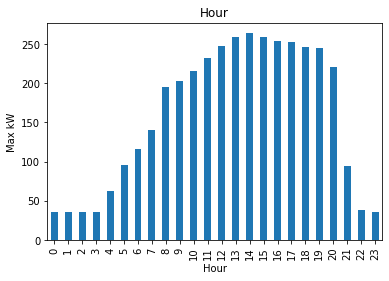

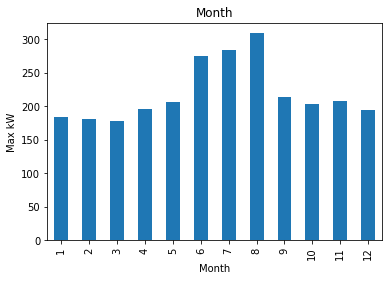

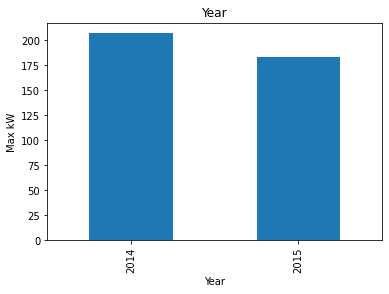

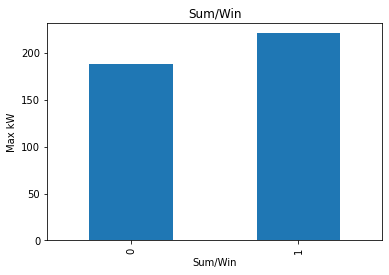

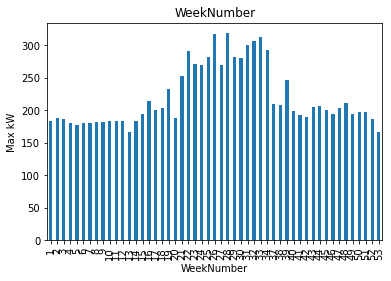

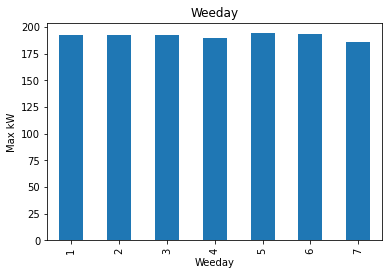

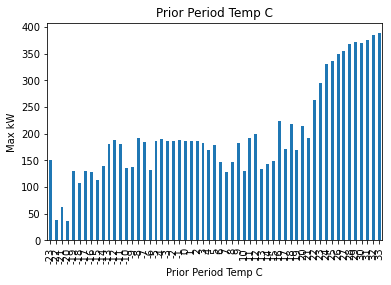

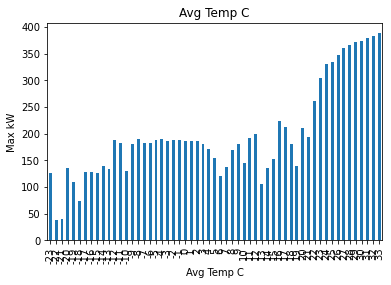

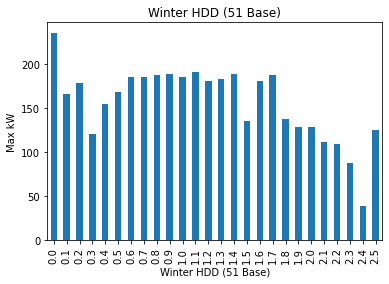

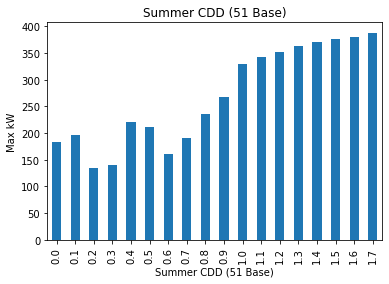

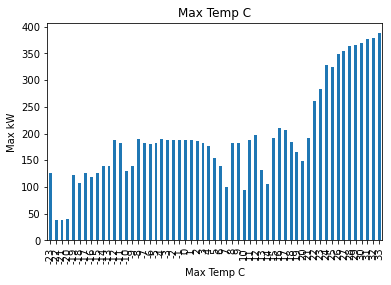

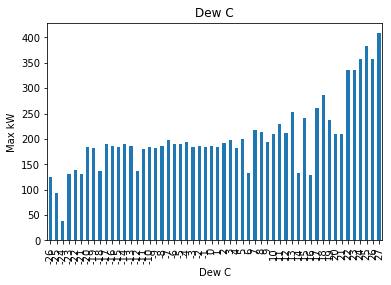

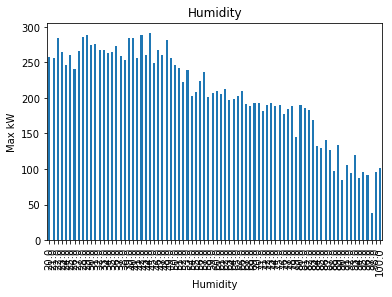

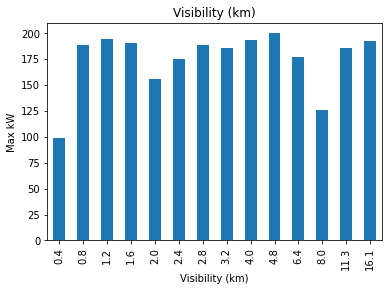

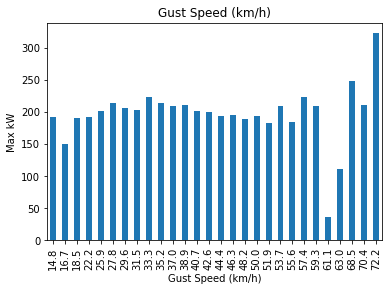

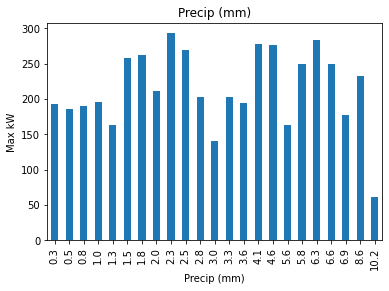

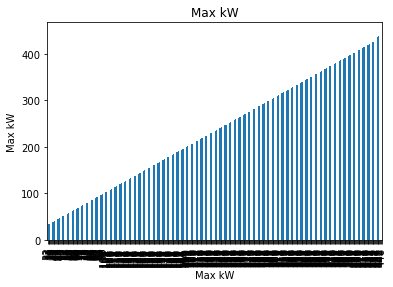

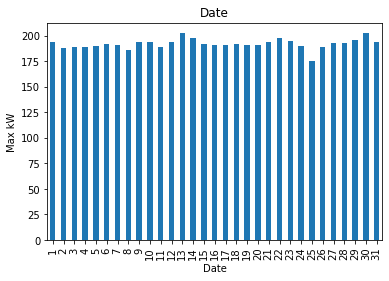

In [24]:
for feature in numerical_features:
    data1=data.copy()
    data1.groupby(feature)['Max kW'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Max kW')
    plt.title(feature)
    plt.show()

In [25]:
Categorical_features= [feature for feature in data.columns if data[feature].dtypes == 'O']
print ("Categorical features are " , len(Categorical_features))

data[Categorical_features].head()

Categorical features are  4


,Wind Dir,Wind Speed (km/h),Events,Conditions
0,West,14.8,NaN,Overcast
1,WSW,14.8,NaN,Overcast
2,WSW,13,NaN,Overcast
3,WSW,14.8,NaN,Light Drizzle
4,West,14.8,NaN,Overcast


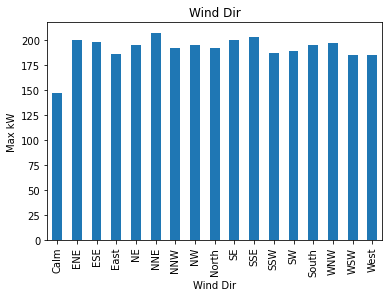

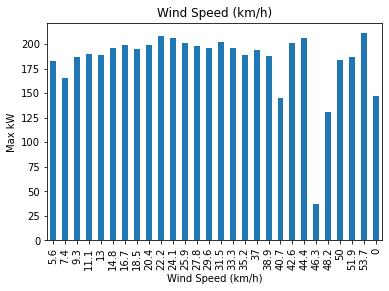

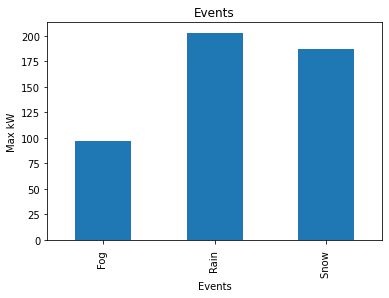

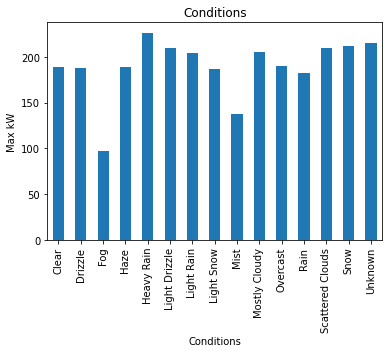

In [28]:
# find out relationship between categorical variables and dependent feature Salesprice
for feature in Categorical_features:
    data2=data.copy()
    data2.groupby(feature)['Max kW'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Max kW')
    plt.title(feature)
    plt.show()

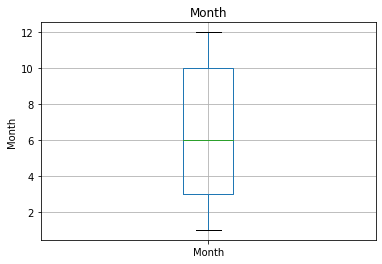

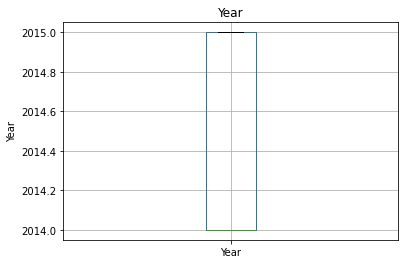

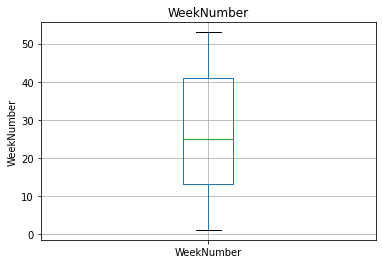

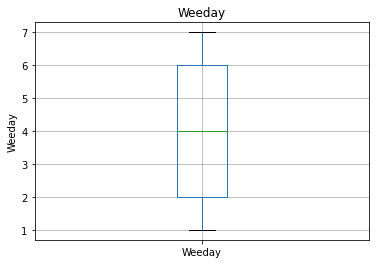

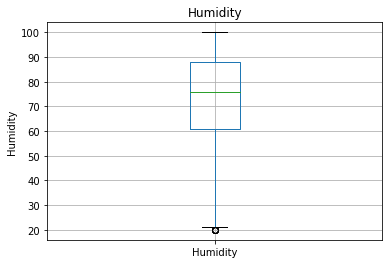

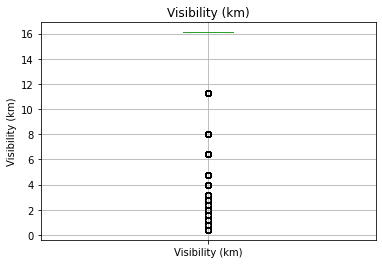

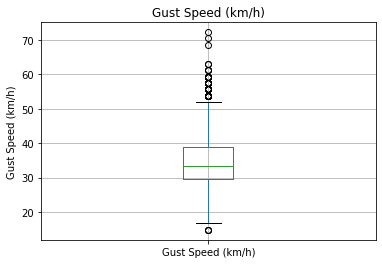

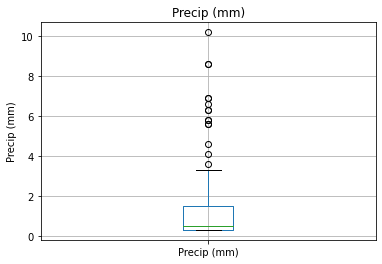

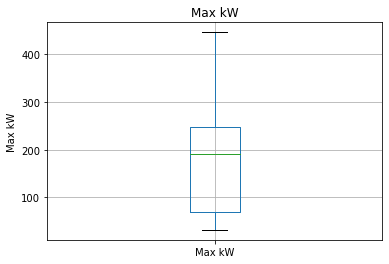

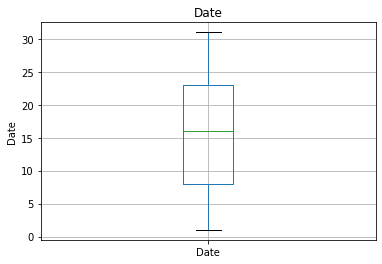

In [29]:
# Boxplot to see if there are any outliers

for feature in numerical_features:
    data3=data.copy()
    if 0 in data3[feature].unique():
        pass
    else:
        data3[feature]=np.log(data3[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [36]:
# 24 hour profile to see if there are any outliers 

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


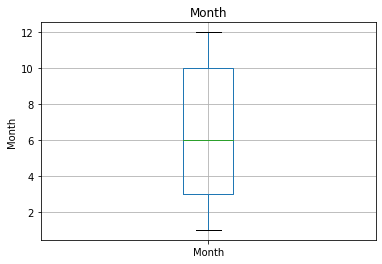

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


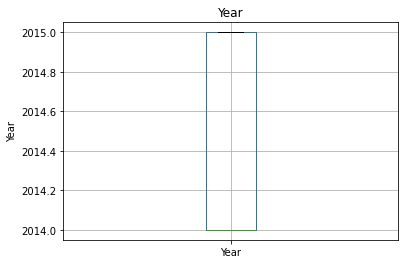

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


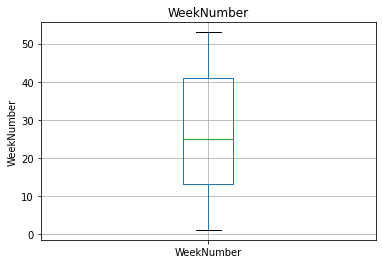

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


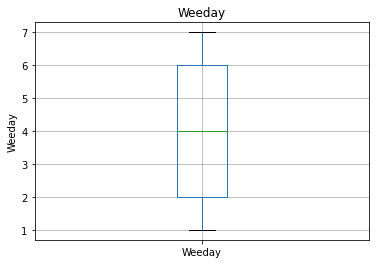

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


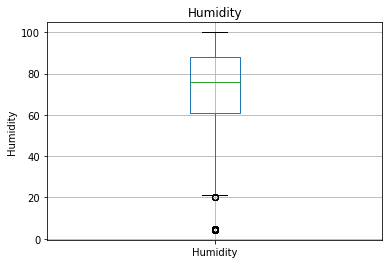

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


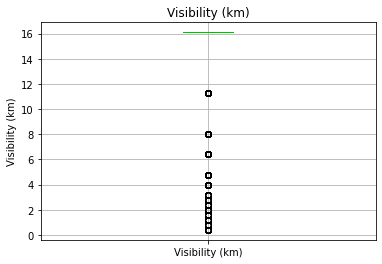

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


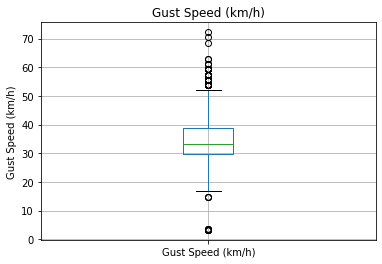

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


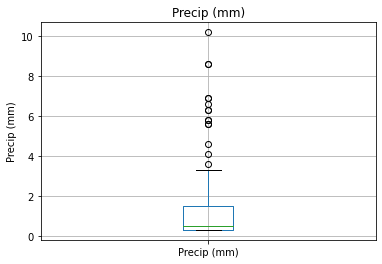

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


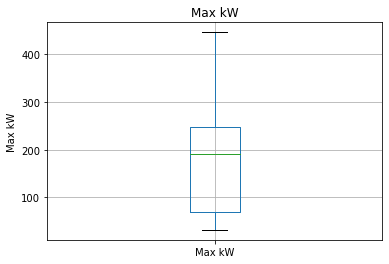

C:\Users\bhatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


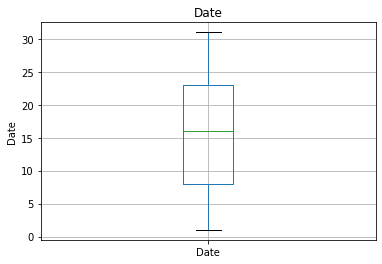

In [40]:
for feature in numerical_features:
    data4=data[0:24]
    if 0 in data[feature].unique():
        pass
    else:
        data4[feature]=np.log(data4[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# missing Value treatment

In [43]:
#Replacing the missing values with median since the distribution is skewed as seen in the visualisation above

data['Gust Speed (km/h)'] = data['Gust Speed (km/h)'].fillna(data['Gust Speed (km/h)'].median())
data['Precip (mm)'] = data['Precip (mm)'].fillna(data['Precip (mm)'].median())
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].median())
data['Visibility (km)'] = data['Visibility (km)'].fillna(data['Visibility (km)'].median())

In [47]:
data['Wind Speed (km/h)'] = data['Wind Speed (km/h)'].fillna(data['Wind Speed (km/h)'].median())
data['Wind Speed (km/h)']=data['Wind Speed (km/h)'].astype(int)

In [48]:
data.isna().sum()

Hour                       0
Month                      0
Year                       0
Sum/Win                    0
WeekNumber                 0
Weeday                     0
Prior Period Temp C        0
Avg Temp C                 0
Winter HDD (51 Base)       0
Summer CDD (51 Base)       0
Max Temp C                 0
Dew C                      0
Humidity                   0
Visibility (km)            0
Wind Dir                   0
Wind Speed (km/h)          0
Gust Speed (km/h)          0
Precip (mm)                0
Events                  7766
Conditions                 0
Max kW                     0
Date                       0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Month                 8215 non-null   int64  
 2   Year                  8215 non-null   int64  
 3   Sum/Win               8215 non-null   int64  
 4   WeekNumber            8215 non-null   int64  
 5   Weeday                8215 non-null   int64  
 6   Prior Period Temp C   8215 non-null   int64  
 7   Avg Temp C            8215 non-null   int64  
 8   Winter HDD (51 Base)  8215 non-null   float64
 9   Summer CDD (51 Base)  8215 non-null   float64
 10  Max Temp C            8215 non-null   int64  
 11  Dew C                 8215 non-null   int64  
 12  Humidity              8215 non-null   float64
 13  Visibility (km)       8215 non-null   float64
 14  Wind Dir              8215 non-null   object 
 15  Wind Speed (km/h)    

LabelEncoding of the categorical features 

In [51]:
from sklearn.preprocessing import LabelEncoder
data['Wind Dir']= data['Wind Dir'].astype(str)
lb_make = LabelEncoder()
data['Wind Dir1'] = lb_make.fit_transform(data['Wind Dir'])
#data.head()

,Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,Winter HDD (51 Base),Summer CDD (51 Base),...,Visibility (km),Wind Dir,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW,Date,Wind Dir1
0,0,5,2014,1,18,4,6,6,0.3,0.0,...,2.778819,West,14,33.300000,0.5,NaN,Overcast,35,1,16
1,1,5,2014,1,18,4,6,6,0.3,0.0,...,2.778819,WSW,14,33.300000,0.5,NaN,Overcast,35,1,15
2,2,5,2014,1,18,4,6,6,0.3,0.0,...,2.778819,WSW,13,33.300000,0.5,NaN,Overcast,35,1,15
3,3,5,2014,1,18,4,7,6,0.3,0.0,...,2.778819,WSW,14,3.254243,0.5,NaN,Light Drizzle,36,1,15
4,4,5,2014,1,18,4,6,6,0.3,0.0,...,2.778819,West,14,33.300000,0.5,NaN,Overcast,63,1,16


In [52]:
data['Events']= data['Events'].astype(str)
lb_make = LabelEncoder()
data['Events1'] = lb_make.fit_transform(data['Events'])

In [54]:
data['Conditions']= data['Conditions'].astype(str)
lb_make = LabelEncoder()
data['Conditions1'] = lb_make.fit_transform(data['Conditions'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Month                 8215 non-null   int64  
 2   Year                  8215 non-null   int64  
 3   Sum/Win               8215 non-null   int64  
 4   WeekNumber            8215 non-null   int64  
 5   Weeday                8215 non-null   int64  
 6   Prior Period Temp C   8215 non-null   int64  
 7   Avg Temp C            8215 non-null   int64  
 8   Winter HDD (51 Base)  8215 non-null   float64
 9   Summer CDD (51 Base)  8215 non-null   float64
 10  Max Temp C            8215 non-null   int64  
 11  Dew C                 8215 non-null   int64  
 12  Humidity              8215 non-null   float64
 13  Visibility (km)       8215 non-null   float64
 14  Wind Dir              8215 non-null   object 
 15  Wind Speed (km/h)    

,Hour,Month,Year,Sum/Win,WeekNumber,Weeday,Prior Period Temp C,Avg Temp C,Winter HDD (51 Base),Summer CDD (51 Base),...,Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Events,Conditions,Max kW,Date,Wind Dir1,Events1,Conditions1
0,0,5,2014,1,18,4,6,6,0.3,0.0,...,14,33.300000,0.5,nan,Overcast,35,1,16,3,10
1,1,5,2014,1,18,4,6,6,0.3,0.0,...,14,33.300000,0.5,nan,Overcast,35,1,15,3,10
2,2,5,2014,1,18,4,6,6,0.3,0.0,...,13,33.300000,0.5,nan,Overcast,35,1,15,3,10
3,3,5,2014,1,18,4,7,6,0.3,0.0,...,14,3.254243,0.5,nan,Light Drizzle,36,1,15,3,5
4,4,5,2014,1,18,4,6,6,0.3,0.0,...,14,33.300000,0.5,nan,Overcast,63,1,16,3,10


In [55]:
data=data.drop(['Wind Dir','Events','Conditions'],axis=1)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Month                 8215 non-null   int64  
 2   Year                  8215 non-null   int64  
 3   Sum/Win               8215 non-null   int64  
 4   WeekNumber            8215 non-null   int64  
 5   Weeday                8215 non-null   int64  
 6   Prior Period Temp C   8215 non-null   int64  
 7   Avg Temp C            8215 non-null   int64  
 8   Winter HDD (51 Base)  8215 non-null   float64
 9   Summer CDD (51 Base)  8215 non-null   float64
 10  Max Temp C            8215 non-null   int64  
 11  Dew C                 8215 non-null   int64  
 12  Humidity              8215 non-null   float64
 13  Visibility (km)       8215 non-null   float64
 14  Wind Speed (km/h)     8215 non-null   int32  
 15  Gust Speed (km/h)    

# Correlation Matrix

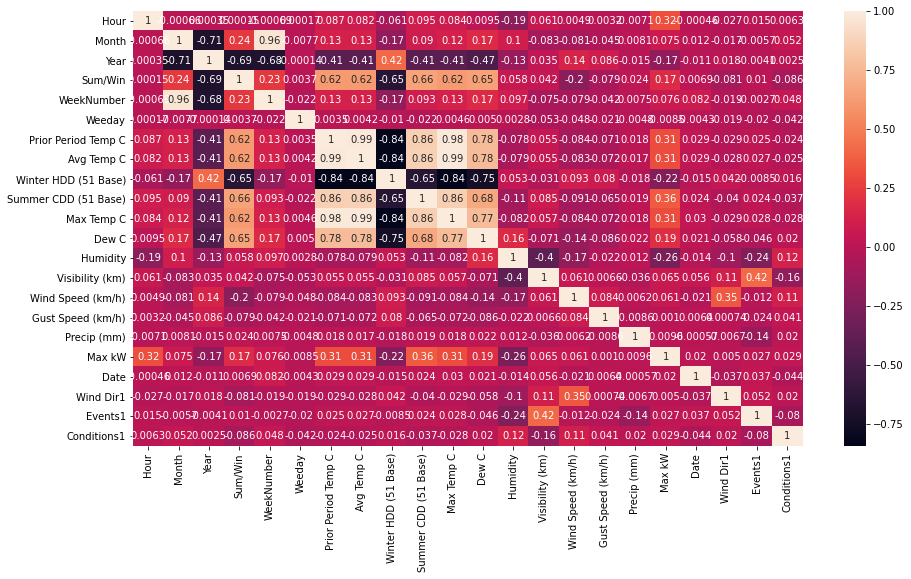

In [57]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

As we can see from the correlation matrix that features like weekno. and month are highly correlated to each other sp we will choose Week no. out of the two.
Also SummerCDD, PriorTemp, Max Temp , Dew and Average temp are highly correlated to each other , so we will proceed with selecting Average temperature amongst these .

In [60]:
data=data.drop(['Month','Prior Period Temp C','Summer CDD (51 Base)','Max Temp C','Dew C'],axis=1)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Year                  8215 non-null   int64  
 2   Sum/Win               8215 non-null   int64  
 3   WeekNumber            8215 non-null   int64  
 4   Weeday                8215 non-null   int64  
 5   Avg Temp C            8215 non-null   int64  
 6   Winter HDD (51 Base)  8215 non-null   float64
 7   Humidity              8215 non-null   float64
 8   Visibility (km)       8215 non-null   float64
 9   Wind Speed (km/h)     8215 non-null   int32  
 10  Gust Speed (km/h)     8215 non-null   float64
 11  Precip (mm)           8215 non-null   float64
 12  Max kW                8215 non-null   int64  
 13  Date                  8215 non-null   int32  
 14  Wind Dir1             8215 non-null   int32  
 15  Events1              

In [62]:
#changing into dependent and independent feature 

In [63]:
x = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16]]
y = data['Max kW']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hour                  8215 non-null   int64  
 1   Year                  8215 non-null   int64  
 2   Sum/Win               8215 non-null   int64  
 3   WeekNumber            8215 non-null   int64  
 4   Weeday                8215 non-null   int64  
 5   Avg Temp C            8215 non-null   int64  
 6   Winter HDD (51 Base)  8215 non-null   float64
 7   Humidity              8215 non-null   float64
 8   Visibility (km)       8215 non-null   float64
 9   Wind Speed (km/h)     8215 non-null   int32  
 10  Gust Speed (km/h)     8215 non-null   float64
 11  Precip (mm)           8215 non-null   float64
 12  Date                  8215 non-null   int32  
 13  Wind Dir1             8215 non-null   int32  
 14  Events1               8215 non-null   int32  
 15  Conditions1          

In [65]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25)
x_train.head()

,Hour,Year,Sum/Win,WeekNumber,Weeday,Avg Temp C,Winter HDD (51 Base),Humidity,Visibility (km),Wind Speed (km/h),Gust Speed (km/h),Precip (mm),Date,Wind Dir1,Events1,Conditions1
3364,13,2014,1,41,5,15,0.0,48.0,16.1,9,33.3,0.5,10,4,3,0
5131,9,2014,0,52,2,5,0.4,85.0,16.1,16,33.3,0.5,23,12,3,0
8210,19,2015,0,18,4,16,0.0,35.0,16.1,11,33.3,0.5,30,5,3,0
2497,8,2014,1,33,4,22,0.0,80.0,16.1,0,33.3,0.5,14,0,3,0
6625,16,2015,0,9,1,-8,1.4,37.0,16.1,5,33.3,0.5,23,15,3,0


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ]

print("Results...")

for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 26.552083629778764
Linear Regression : 80.07524853237075
RandomForest : 21.99248498273164


In [72]:
# we can see here that algorithmn as simple as liner regression gives us 80 % accuracy 

# Below is the plot for predicted vs test values 

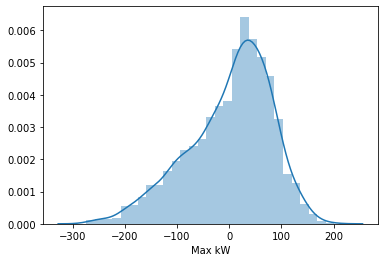

In [70]:
import seaborn as sns

sns.distplot(y_test-predictions)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score 
